In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
Train = pd.read_csv(r"C:\Users\hp\Downloads\SalaryData_Train(1).csv.crdownload")

In [3]:
Test = pd.read_csv(r"C:\Users\hp\Downloads\SalaryData_Test(1).csv.crdownload")

In [4]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,30,Private,Bachelors,13.0,Never-married,Exec-managerial,Unmarried,White,Female,0.0,0.0,45.0,United-States,>50K
1837,44,Private,Some-college,10.0,Divorced,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
1838,49,Private,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
1839,75,Self-emp-not-inc,Masters,14.0,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,0.0,50.0,United-States,<=50K


In [5]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,42,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
2537,53,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298.0,0.0,40.0,United-States,>50K
2538,35,Private,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,White,Female,0.0,0.0,40.0,Dominican-Republic,<=50K
2539,37,Private,Assoc-acdm,12,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K


In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1841 non-null   int64  
 1   workclass      1840 non-null   object 
 2   education      1840 non-null   object 
 3   educationno    1840 non-null   float64
 4   maritalstatus  1840 non-null   object 
 5   occupation     1840 non-null   object 
 6   relationship   1840 non-null   object 
 7   race           1840 non-null   object 
 8   sex            1840 non-null   object 
 9   capitalgain    1840 non-null   float64
 10  capitalloss    1840 non-null   float64
 11  hoursperweek   1840 non-null   float64
 12  native         1840 non-null   object 
 13  Salary         1840 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 201.5+ KB


In [7]:
Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,2541.000000,2541.000000,2540.000000,2540.000000,2540.000000
mean,38.510823,10.147973,1317.429134,90.646063,41.060236
std,13.249349,2.634893,8513.548705,411.442487,11.897617
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


In [8]:
Train[Train.isnull().any(axis=1)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
1840,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Train.isnull().sum()
## shows the total no of nan value in each columns 


age              0
workclass        1
education        1
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [10]:
## there is no nan values in the Train Data set

In [11]:
Test[Test.isnull().any(axis=1)].shape
## shows the total no of nan value in each columns 


(1, 14)

In [12]:
## there is no nan values in the Test Data set

In [13]:
Train['Salary'].value_counts()

 <=50K    1366
 >50K      474
Name: Salary, dtype: int64

In [14]:
Test['Salary'].value_counts()

 <=50K    1903
 >50K      637
Name: Salary, dtype: int64

In [15]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,182,35
Armed-Forces,2,0
Craft-repair,178,53
Exec-managerial,116,124
Farming-fishing,44,9
Handlers-cleaners,73,2
Machine-op-inspct,109,17
Other-service,203,10
Priv-house-serv,4,0


In [16]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,30,19
Local-gov,105,29
Private,1047,307
Self-emp-inc,24,50
Self-emp-not-inc,109,44
State-gov,50,25
Without-pay,1,0


In [17]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,19,2,2,9,1,1,0,2,0,7,0,2,3,1
Local-gov,20,0,8,13,5,3,2,12,0,37,20,0,4,10
Private,160,0,184,149,21,68,120,181,4,146,10,177,51,83
Self-emp-inc,1,0,8,31,3,0,2,1,0,7,0,17,1,3
Self-emp-not-inc,0,0,28,28,22,3,0,11,0,26,0,28,1,6
State-gov,17,0,1,10,0,0,2,6,0,24,8,0,5,2
Without-pay,0,0,0,0,1,0,0,0,0,0,0,0,0,0


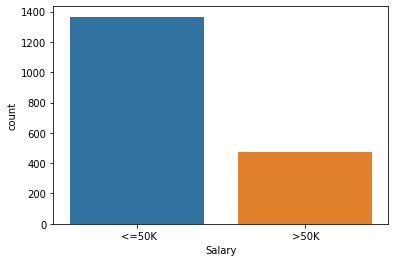

 <=50K    1366
 >50K      474
Name: Salary, dtype: int64

In [18]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

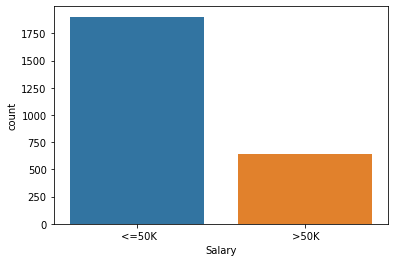

 <=50K    1903
 >50K      637
Name: Salary, dtype: int64

In [19]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

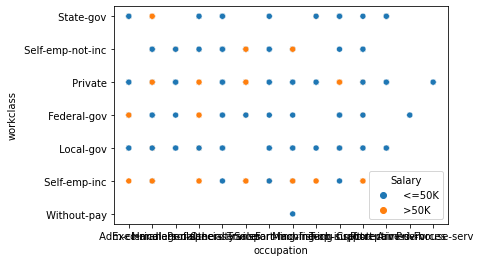

In [20]:
sns.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])

<Axes: xlabel='education'>

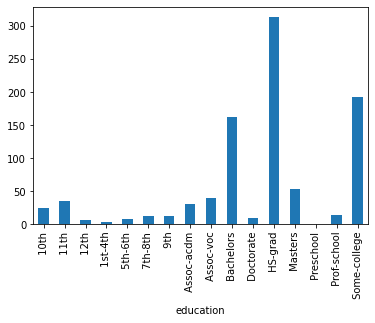

In [21]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

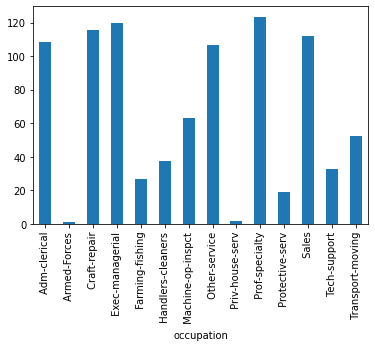

In [22]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

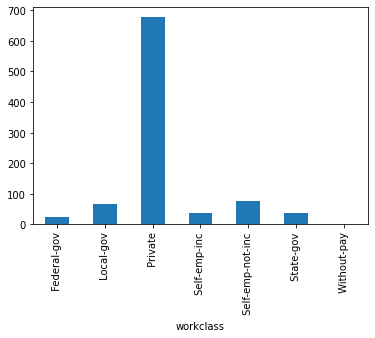

In [23]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

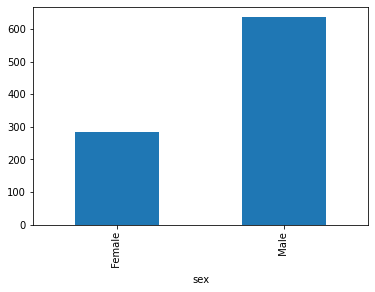

In [24]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

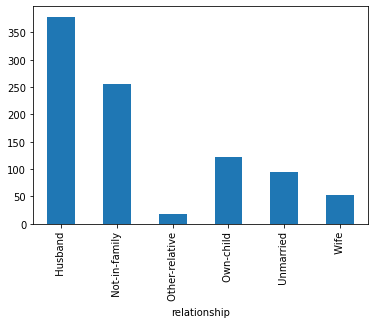

In [25]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

AttributeError: 'Axes' object has no attribute 'is_first_col'

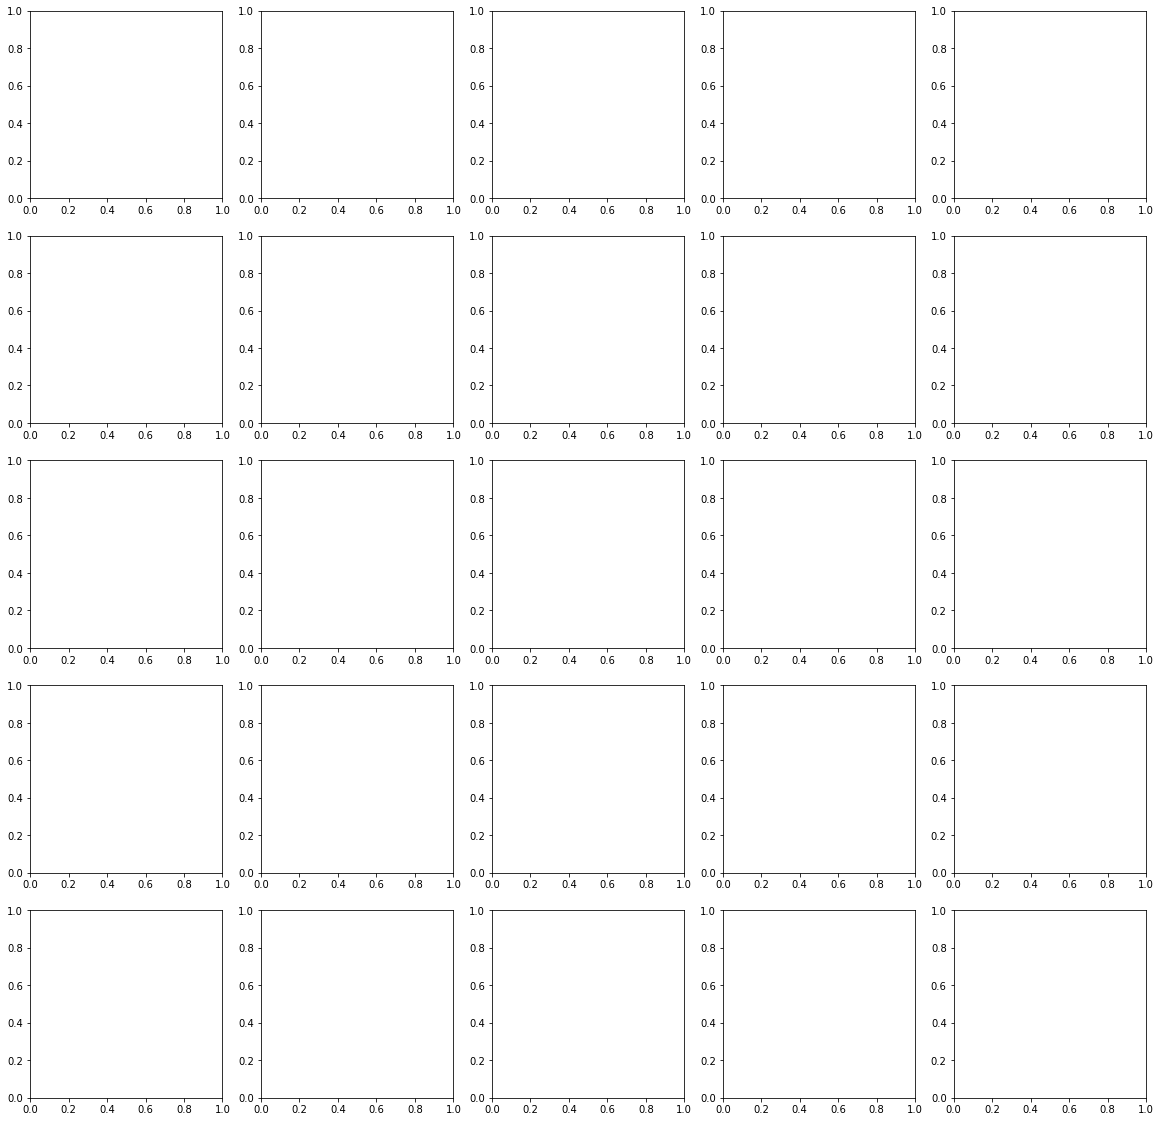

In [26]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(Train,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

In [27]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [28]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [29]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [30]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [31]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [32]:
len(colnames)

14

In [33]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [34]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [35]:
x_train = Train[colnames[0:13]]
y_train = Train[colnames[13]]
x_test = Test[colnames[0:13]]
y_test = Test[colnames[13]]

In [36]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# SVM Model

In [38]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [39]:
pred_test_linear = model_linear.predict(x_test)

In [40]:
np.mean(pred_test_linear==y_test) # Accuracy = 80.98%

0.8098273572377158

In [41]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [42]:
np.mean(pred_test_poly==y_test) # Accuracy = 82.05%

0.8205179282868525

In [43]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [44]:
np.mean(pred_test_rbf==y_test) # Accuracy = 82.80%

0.8280876494023904

In [45]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [46]:
np.mean(pred_test_sig==y_test) #Accuracy = 82.80%

0.8280876494023904

# SVM With GridSearch

In [47]:
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [48]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [49]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8294490262517703)

In [50]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [51]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [52]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [53]:
# kernel = linear
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [ ]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

In [55]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8118431562437083)

In [56]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [57]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [58]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [59]:
# kernel = poly
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [60]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [61]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.819137640901382)

In [62]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [63]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [64]:
# kernel = sigmoid
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [65]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [66]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7953982802140654)

In [67]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [68]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488
